In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import imread
from matplotlib.pyplot import figure

# Random Case
## Data Loading

In [3]:
with open('Random/MultiCoor.pkl', 'rb') as f:
    coor = pickle.load(f)
    
drones = []
for i in range(4):
    with open(f'Random/ExperimentSim3R/crazyflie{i}.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)

## Data preparation

Checking the different entries for any discrepancy

In [5]:
newDrones = []

for j in range(len(drones)):
    crazy = drones[j]
    recent = 0
    new = [crazy[0]]
    for i in range(len(crazy)):
        if i == 0:
            continue

        if crazy[i-1][1] == crazy[i][1]:
            continue

        new.append(crazy[i])
    print(len(crazy))
    print(len(new))
    newDrones.append(new)

200
200
200
200
200
200
200
200


Calculating the run search times by taking the difference from the previous to the next iteration

In [7]:
for i in range(len(coor)):
    if i == 0:
        continue
    
    coor[i-1][1] = coor[i][1]-coor[i-1][1]
coor.pop(-1)

[200, 1746829956.6189122]

Removing all runs with human intervention (>800 seconds)

In [9]:
for i in reversed(range(len(coor))):
    if coor[i][1] > 1000:
        for x in range(len(newDrones)):
            newDrones[x].pop(i)
            
        print(coor[i])
        coor.pop(i)      

[182, 5172.050007343292]
[98, 1661.650889158249]
[94, 1677.0098679065704]
[84, 1100.7100026607513]
[6, 2240.3902204036713]


## Plotting

### Time
plotting time per iteration

53.368974924087524
756.6105756759644
375.53428658827755


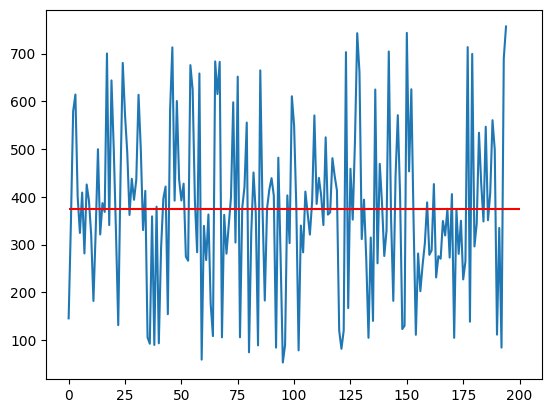

In [11]:
x = [i for i in range(len(coor))]
y = [coor[j][1] for j in range(len(coor))]
print(min(y))
print(max(y))
avg = sum(y)/len(y)
print(avg)
plt.plot(x,y)
plt.hlines(avg, 0 ,200, color='red')
plt.savefig('randomTime.png')

### Search types
collecting all search types for graphing

In [13]:
names = []
allWins = []
allFails = []
allCalls = []

for i in range(len(newDrones)):
    crazy = newDrones[i]
    print(crazy[0][0][1:])
    names.append(crazy[0][0][1:])
    fails = 0
    wins = 0
    callbacks = 0
    for j in crazy:
        case = j[4]
        if case == 0:
            fails+= 1
        elif case == 1:
            wins += 1
        else:
            callbacks+= 1
    allWins.append(wins)
    allFails.append(fails)
    allCalls.append(callbacks)
    print(f'Wins {wins}') 
    print(f'Fails {fails}') 
    print(f'Callbacks {callbacks}') 
    
di = {
    'Successful Searches': allWins,
    'Unfinished run' : allFails,
    'Callbacks' : allCalls
}
print(sum(allWins), sum(allFails), sum(allCalls))

crazyflie0
Wins 32
Fails 86
Callbacks 77
crazyflie1
Wins 43
Fails 94
Callbacks 58
crazyflie2
Wins 37
Fails 92
Callbacks 66
crazyflie3
Wins 37
Fails 96
Callbacks 62
149 368 263


149


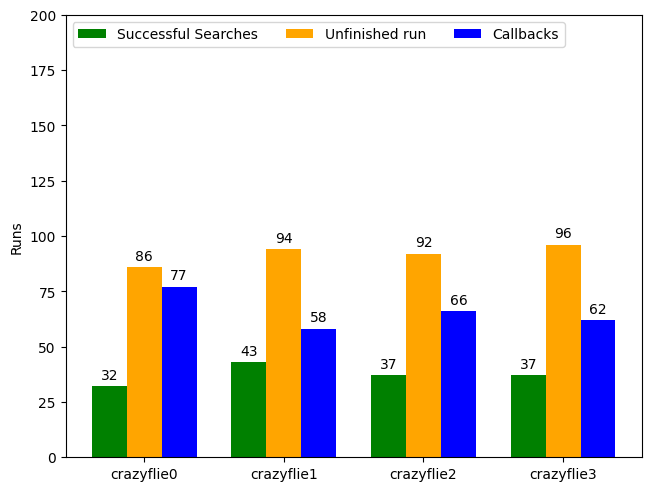

In [14]:
x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color = ['green', 'orange', 'blue']

fig, ax = plt.subplots(layout='constrained')

for name, count in di.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=name, color=color[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)


plt.savefig('random.png')
print(sum(allWins))

### Strategies

Select 4 random iteration, add the starting point and sort by iteration for cleaner graph

In [16]:
boxes = [(21.0, -5.0),(15.0, 6.0),(5.0,0.3),(-2.0,7.2),(-2.2, -2.6),(-5.6,-5.9),(20.2, -0.2),(11.59,0.67)]
drones = []
for i in range(len(newDrones)):
    crazy = newDrones[i][-1][:]
    box = [boxes[x] for x in crazy[2]]
    box.insert(0, (0.0,0.0))
    crazy.append(box[:])
    drones.append(crazy)

print(drones)


[['/crazyflie0', 199, [4, 3, 0, 6, 1, 7, 2, 5], 1, 0, 4, [(0.0, 0.0), (-2.2, -2.6), (-2.0, 7.2), (21.0, -5.0), (20.2, -0.2), (15.0, 6.0), (11.59, 0.67), (5.0, 0.3), (-5.6, -5.9)]], ['/crazyflie1', 199, [2, 1, 5, 4, 7, 6, 0, 3], 1, 0, 1, [(0.0, 0.0), (5.0, 0.3), (15.0, 6.0), (-5.6, -5.9), (-2.2, -2.6), (11.59, 0.67), (20.2, -0.2), (21.0, -5.0), (-2.0, 7.2)]], ['/crazyflie2', 199, [5, 7, 1, 3, 2, 6, 4, 0], 1, 0, 1, [(0.0, 0.0), (-5.6, -5.9), (11.59, 0.67), (15.0, 6.0), (-2.0, 7.2), (5.0, 0.3), (20.2, -0.2), (-2.2, -2.6), (21.0, -5.0)]], ['/crazyflie3', 199, [7, 6, 0, 3, 5, 2, 4, 1], 1, 1, 1, [(0.0, 0.0), (11.59, 0.67), (20.2, -0.2), (21.0, -5.0), (-2.0, 7.2), (-5.6, -5.9), (5.0, 0.3), (-2.2, -2.6), (15.0, 6.0)]]]


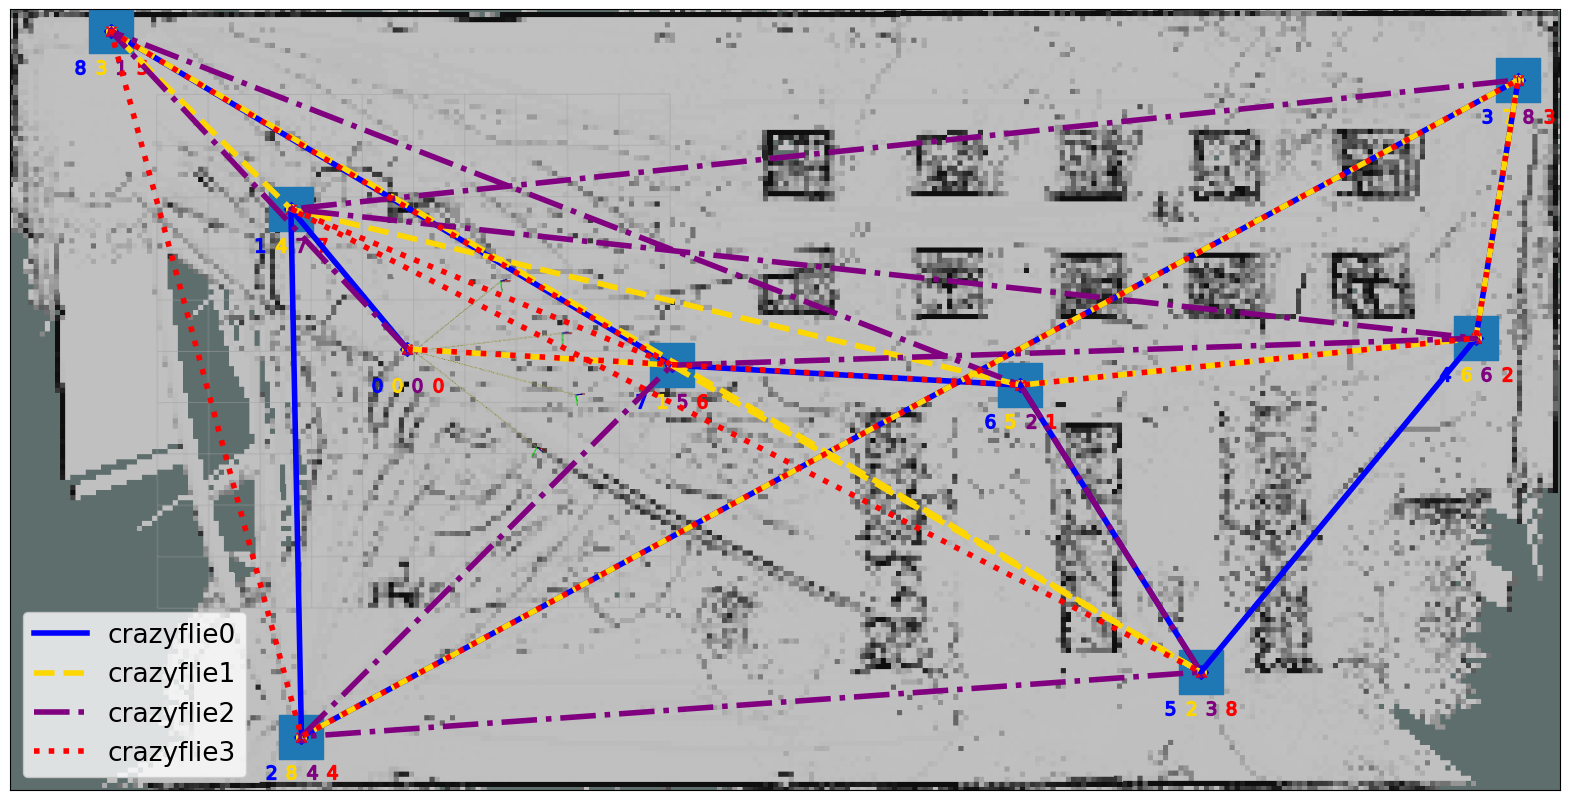

In [17]:
types = ['-','--','-.',':']
n = ['Cr0','Cr1','Cr2','Cr3']
color = ["blue",'gold','purple','red']
shapes = ['D','o','^','x']
counter = 0
mult = -1.5
img = imread("FieldM.png")
figure(figsize=(20, 20))
plt.imshow(img,zorder=0)

xb = [(boxes[x][0]+7.5)*51.706 for x in range(len(boxes))]
yb = [(boxes[x][1]+6.3)*52.62 for x in range(len(boxes))]
plt.scatter(xb,yb, marker = 's',s=1000)

for i in drones:
    x = [(i[-1][x][0]+7.5)*51.706 for x in range(len(i[-1]))]
    y = [(i[-1][x][1]+6.3)*52.62 for x in range(len(i[-1]))]
    
    plt.plot(x,y, ls = types[counter],label=names[counter],linewidth = '4', color = color[counter])
    for i in range(len(x)):
        plt.scatter(x[i],y[i], marker = shapes[counter],s=50, c=color[counter])
        plt.scatter(x[i]+20*mult,y[i]+35, marker = f"${i}$",s=100, c=color[counter])
    counter+= 1
    mult+=1

plt.legend(loc =3, prop={'size': 19})
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])
plt.savefig('randomStrat.png')
plt.show()